Dynamic Time Warping DTW

In [41]:
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

Funkcje do obliczania macierzy kosztów i optymalnej ścieżki - programowanie dynamiczne

In [42]:
def obliczanie_macierzy_kosztow(macierz_odl):
    N, M = macierz_odl.shape        #uzyskanie wielkości macierzy czyli uzyskanie wielkości przebiegów x i y

    macierz_kosz = np.zeros((N + 1, M + 1))         #stworzenie macierzy (N+1)x(M+1) i wypełnienie jej zerami
    for i in range(1, N + 1):
        macierz_kosz[i, 0] = np.inf                 #wypełnienie dodatkowego rzędu wartościami nieskończonymi
    for i in range(1, M + 1):
        macierz_kosz[0, i] = np.inf                 #wypełnienie dodatkowej kolumny wartościami nieskończonymi

    macierz_sledzenia = np.zeros((N, M))            #stworzenie macierzy Nx(M+1) i wypełnienie jej zerami
    for i in range(1, N+1):
        for j in range(1, M+1):
            D = [macierz_kosz[i-1, j-1],            #stworzenie listy zawierającej możliwe pola ruchu
                 macierz_kosz[i-1, j],
                 macierz_kosz[i, j-1]]
            D_id = np.argmin(D)                     #uzyskanie numeru indeksu o najmniejszej wartości RMS
            macierz_kosz[i, j] = macierz_odl[i-1, j-1] + D[D_id]        #nadpisanie elementu macierzy
            macierz_sledzenia[i-1, j-1] = D_id                          #nadpisanie macierzy śledzenia
    macierz_kosz = macierz_kosz[1:, 1:]             #usunięcie 1 rzędu i kolumny (wartości nieskończone)
    sciezka = obliczanie_sciezki(macierz_sledzenia) #uzyskanie optymalnej sciezki
    return (sciezka, macierz_kosz)                  #zwrócenie ścieżki oraz macierzy kosztów

In [43]:
def obliczanie_sciezki(macierz_sledzenia):
    N, M = macierz_sledzenia.shape        #uzyskanie wielkości macierzy czyli uzyskanie wielkości przebiegów x i y
    n = N - 1                                       #uzyskanie wspołrzędjej y końca macierzy
    m = M - 1                                       #uzyskanie wspołrzędnej x końca macierzy
    sciezka = [(n, m)]                              #wspołrzędne początkowe ścieżki
    while n > 0 or m > 0:
        wybor_sciezki = macierz_sledzenia[n, m]     #wybor ruchu
        if wybor_sciezki == 0:                      #ruch po skosie
            n = n - 1
            m = m - 1
        elif wybor_sciezki == 1:                    #ruch w pionie
            n = n - 1
        elif wybor_sciezki == 2:                    #ruch w poziomie
            m = m - 1
        sciezka.append((n, m))                      #dodanie kolejnej wspołrzędnej ścieżki

    sciezka = sciezka[::-1]                         #usuniecie ostatnich współrzędnych ścieżki
    return sciezka                                  #zwrócenie optymalnej ścieżki

Sygnały

In [44]:
#Przebieg krótki
x = np.array([0,0,1,-1,0,0,1,0,1,0])
y = np.array([0,0,0,1,-1,0,0,0.5,0,1,0,0])

#Przebieg średni
#x = np.array([0,1,2,3,1,3,-1,2,2,0,1,-2,0,1,0,1,3,3,1,0])
#y = np.array([0,0,0,1,2,3,0,2,-1,0,2,1,-1,-1,1,2,0,2,3,2,1,0])

#Przebieg długi 1
#t = np.arange(0, 30, 30/100)
#x_tmpl = []
#y_tmpl = []
#for i in range(0, 100):
#    x_tmpl.append(math.sin(t[i]))
#    y_tmpl.append(math.sin(0.5*t[i]+2))
#x = np.array(x_tmpl)
#y = np.array(y_tmpl)

#Przebieg długi 2
#t = np.arange(0, 50, 50/150)
#x_tmpl = []
#y_tmpl = []
#for i in range(0, 150):
#    x_tmpl.append(math.sin(t[i]) + 0.5 * math.sin(0.5*t[i]) + 2 * math.sin(0.8*t[i]+5) + 0.8 * math.sin(3*t[i]+3))
#    y_tmpl.append(3 * math.sin(0.75*t[i]+4) + math.sin(0.5*t[i]+10) + 0.9*math.sin(2*t[i]+1) + 0.5*math.sin(1.5*t[i]+3))
#x = np.array(x_tmpl)
#y = np.array(y_tmpl)

#Przebieg długi 3
#t = np.arange(0, 200, 200/1000)
#x_tmpl = []
#y_tmpl = []
#for i in range(0, 1000):
#    x_tmpl.append(math.sin(t[i]) + 0.5 * math.sin(0.5*t[i]) + 2 * math.sin(0.8*t[i]+5) + 0.8 * math.sin(3*t[i]+3) + math.sin(0.3*t[i]+8))
#    y_tmpl.append(3 * math.sin(0.75*t[i]+4) + math.sin(0.5*t[i]+10) + 0.9*math.sin(2*t[i]+1) + 0.5*math.sin(1.5*t[i]+3) + math.sin(0.1*t[i]-2))
#x = np.array(x_tmpl)
#y = np.array(y_tmpl)

Obliczanie macierzy odległości i kosztów oraz optymalnej ścieżki

In [45]:
N = x.shape[0]                                  #uzyskanie wielkości macierzy (ilości punktów) przebiegu x
M = y.shape[0]                                  #uzyskanie wielkości macierzy (ilości punktów) przebiegu y
macierz_odl = np.zeros((N, M))                  #stworzenie macierzy NxM i wypełnienie jej zerami
for i in range(N):
    for j in range(M):
        macierz_odl[i, j] = abs(x[i] - y[j])    #wyznaczenie wartości poszczególnych elementów macierzy odległości

sciezka, macierz_kosz = obliczanie_macierzy_kosztow(macierz_odl)        #uzyskanie wspórzędnych ścieżki oraz macierzy kosztów
sciezka_x, sciezka_y = zip(*sciezka)            #uzyskanie składowych x i y współrzędnych
odleglosc = (abs(min(x)) + abs(max(y)))/2 + 0.5     #wyliczenie odległości między dwoma wykresami



Przebieg x i y

(-49.95, 1048.95, -11.790426745391677, 9.764343363610804)

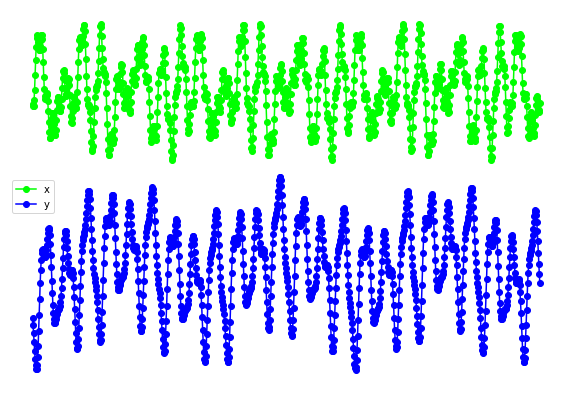

In [46]:
plt.figure(figsize=(10, 7))                                                         #stworzenie okna na wykres
plt.plot(np.arange(x.shape[0]), x + odleglosc, "-o", c="#00ff00", label="x")        #nałożenie na okno przebiegu x
plt.plot(np.arange(y.shape[0]), y - odleglosc, "-o", c="#0000ff", label="y")        #nałożenie na okno przebiegu y
plt.legend()                                                                        #stworzenie legendy
plt.axis("off")                                                                     #usunięcie osi wykresu

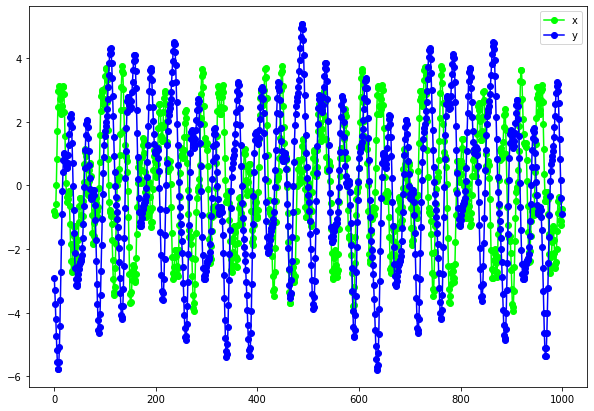

In [47]:
plt.figure(figsize=(10, 7))                                             #stworzenie okna na wykres
plt.plot(np.arange(x.shape[0]), x, "-o", c="#00ff00", label="x")        #nałożenie na okno przebiegu x
plt.plot(np.arange(y.shape[0]), y, "-o", c="#0000ff", label="y")        #nałożenie na okno przebiegu y
plt.legend()                                                            #stworzenie legendy

Wykres przebiegów połączonych

(-49.95, 1048.95, -11.790426745391677, 9.764343363610804)

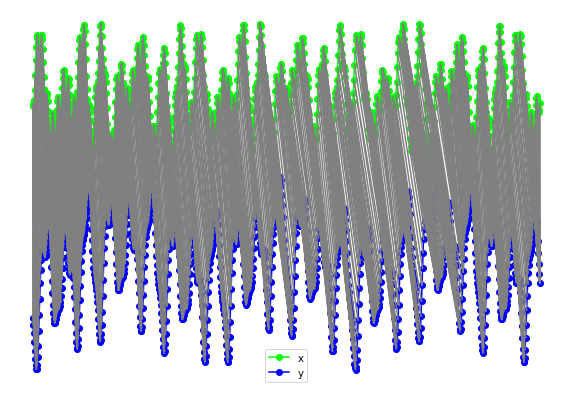

In [48]:
plt.figure(figsize=(10, 7))             #stworzenie okna na wykres
plt.plot(np.arange(x.shape[0]), x + odleglosc, "-o", c="#00ff00", label="x")        #nałożenie na okno przebiegu x
plt.plot(np.arange(y.shape[0]), y - odleglosc, "-o", c="#0000ff", label="y")        #nałożenie na okno przebiegu y
for x_i, y_j in sciezka:
    plt.plot([x_i, y_j], [x[x_i] + odleglosc, y[y_j] - odleglosc], c="#808080")     #nałożenie na okno liń łączących punkty oby przebiegów
plt.legend()                            #stworzenie legendy
plt.axis("off")                         #usunięcie osi wykresu

Wykres macierzy odległości i kosztów wraz z optymalną ścieżką

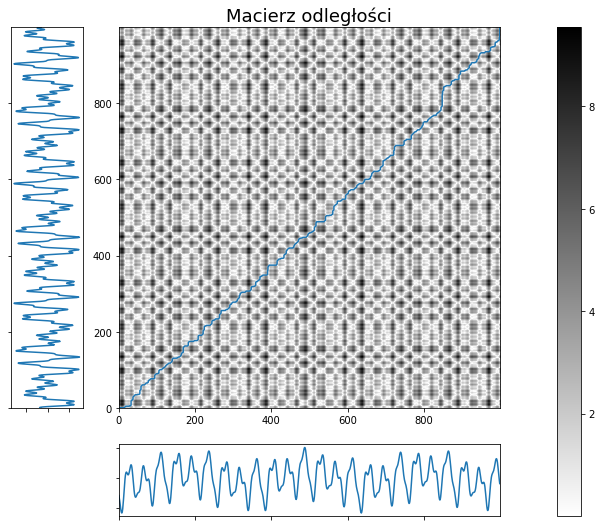

In [49]:
fig, wykres = plt.subplots(1, 1, figsize=(12,9))            #stworzenie okna z 2 wykresami

skala = wykres.imshow(macierz_odl, cmap=plt.cm.binary, interpolation="nearest", origin="lower")    #wyrysowanie macierzy odległości
wykres.set_title("Macierz odległości", size = 18)           #nadanie nazwy wykresowi
wykres.plot(sciezka_y, sciezka_x)                           #narysowanie ścieżki na macierzy odległości
fig.colorbar(skala, ax=wykres)                              #wyrysowanie ramki z podziałem stopniowym

divider = make_axes_locatable(wykres)                       #stworzenie wykresów lokalnych
przebieg_x = divider.append_axes("left", 1, pad=0.5, sharey=wykres)      #utworzenie miejsca na wykres przebiegu x
przebieg_x.plot(x, np.arange(x.shape[0]))                   #utowrzenie przebiegu x
przebieg_x.xaxis.set_tick_params(labelbottom=False)         #usunięcie wartości osi x
przebieg_x.yaxis.set_tick_params(labelleft=False)           #usuniecie wartości osi y

przebieg_y = divider.append_axes("bottom", 1, pad=0.5, sharex=wykres)    #utworzenie miejsca na wykres przebiegu x
przebieg_y.plot(np.arange(y.shape[0]), y)                   #utowrzenie przebiegu y
przebieg_y.xaxis.set_tick_params(labelbottom=False)         #usunięcie wartości osi x
przebieg_y.yaxis.set_tick_params(labelleft=False)           #usunięcie wartości osi y

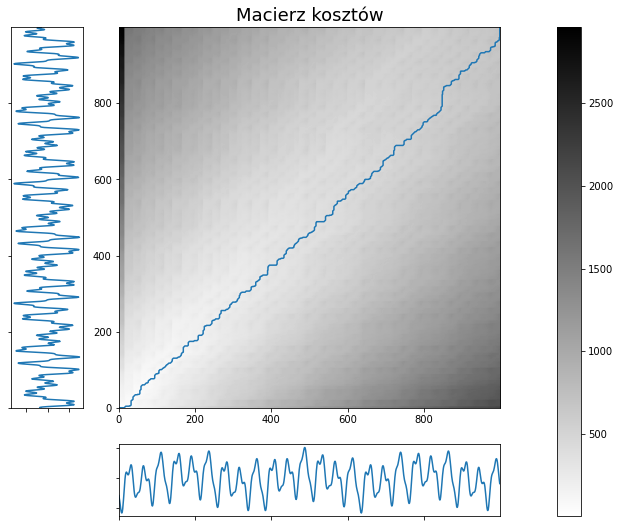

In [50]:
fig, wykres = plt.subplots(1, 1, figsize=(12,9))            #stworzenie okna z 2 wykresami

skala = wykres.imshow(macierz_kosz, cmap=plt.cm.binary, interpolation="nearest", origin="lower")   #wyrysowanie macierzy kosztów
wykres.set_title("Macierz kosztów", size = 18)              #nadanie nazwy wykresowi
wykres.plot(sciezka_y, sciezka_x)                           #narysowanie ścieżki na macierzy kosztów
fig.colorbar(skala, ax=wykres)                              #wyrysowanie ramki z podziałem stopniowym

divider = make_axes_locatable(wykres)                       #stworzenie wykresów lokalnych
przebieg_x = divider.append_axes("left", 1, pad=0.5, sharey=wykres)      #utworzenie miejsca na wykres przebiegu x
przebieg_x.plot(x, np.arange(x.shape[0]))                   #utowrzenie przebiegu x
przebieg_x.xaxis.set_tick_params(labelbottom=False)         #usunięcie wartości osi x
przebieg_x.yaxis.set_tick_params(labelleft=False)           #usuniecie wartości osi y

przebieg_y = divider.append_axes("bottom", 1, pad=0.5, sharex=wykres)    #utworzenie miejsca na wykres przebiegu x
przebieg_y.plot(np.arange(y.shape[0]), y)                   #utowrzenie przebiegu y
przebieg_y.xaxis.set_tick_params(labelbottom=False)         #usunięcie wartości osi x
przebieg_y.yaxis.set_tick_params(labelleft=False)           #usunięcie wartości osi y